In [1]:
%pylab inline
from glob import glob
from numpy import load
import pandas as pd


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
%pwd

'/Users/yoavfreund/projects/Density-KD-Trees'

In [9]:
path='images/'
band_names=['Red','Green','Blue','NIR','SWIR1','SWIR2','TEMP1','NL']

In [10]:
files=glob(f'{path}*.npz')
len(files)

90

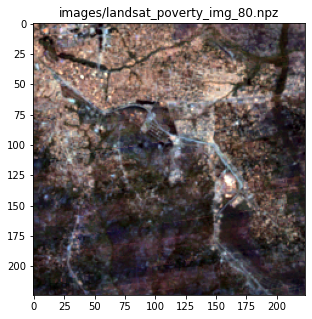

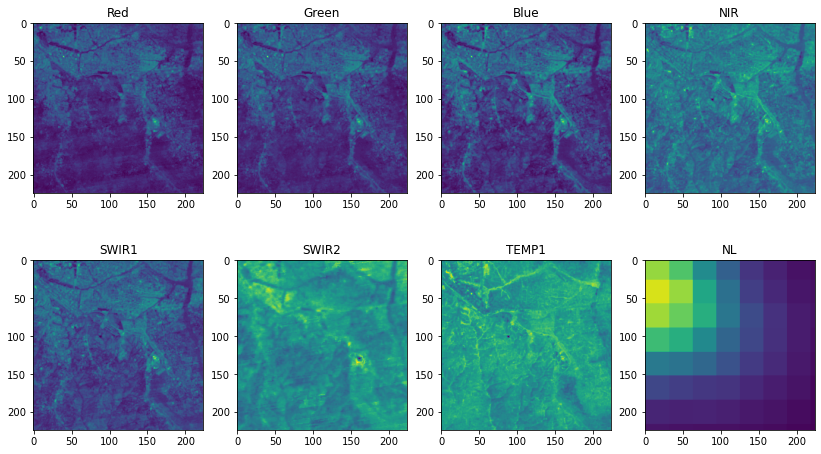

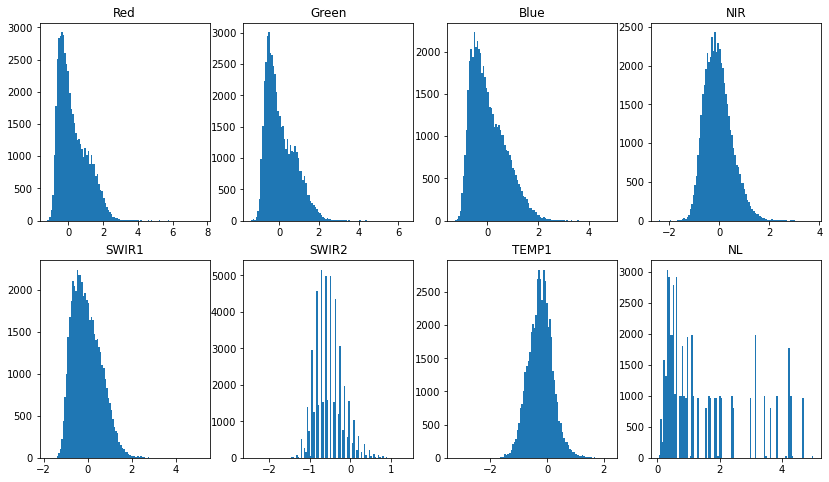

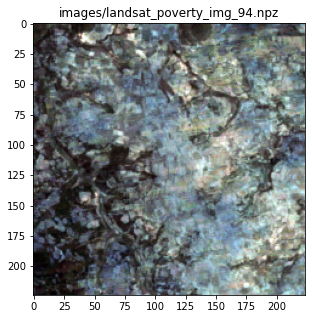

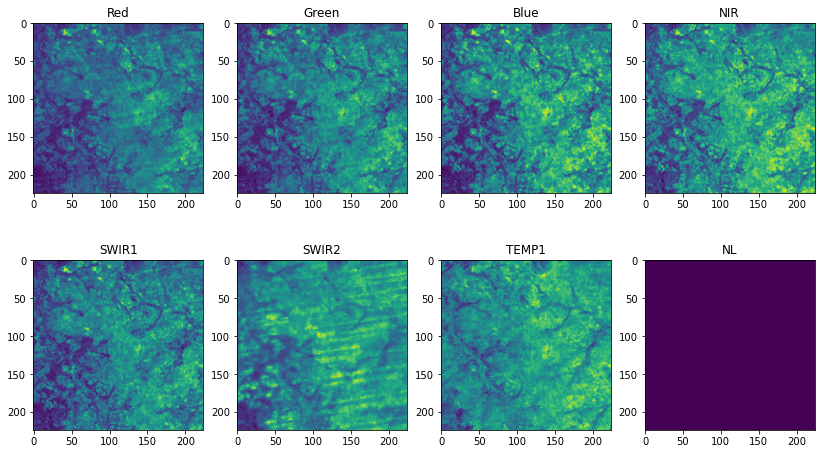

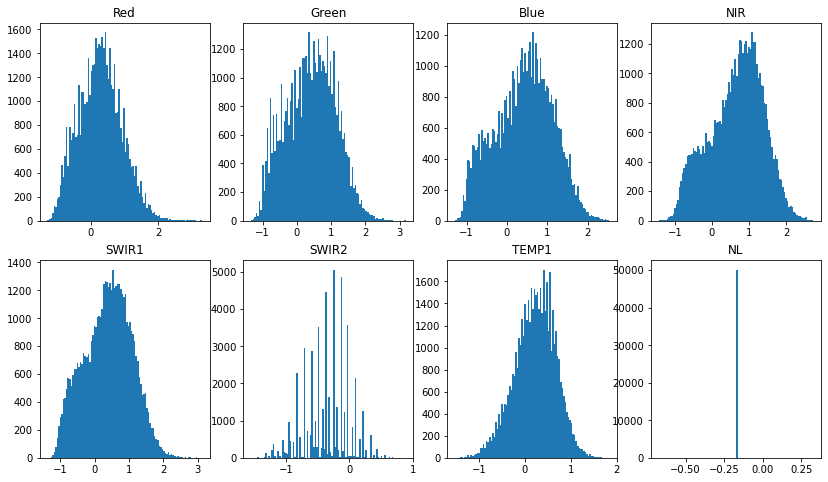

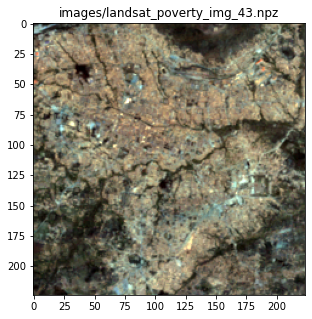

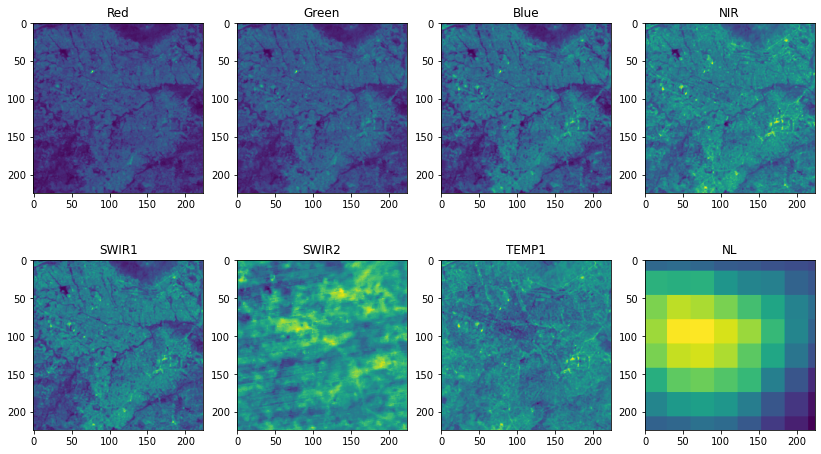

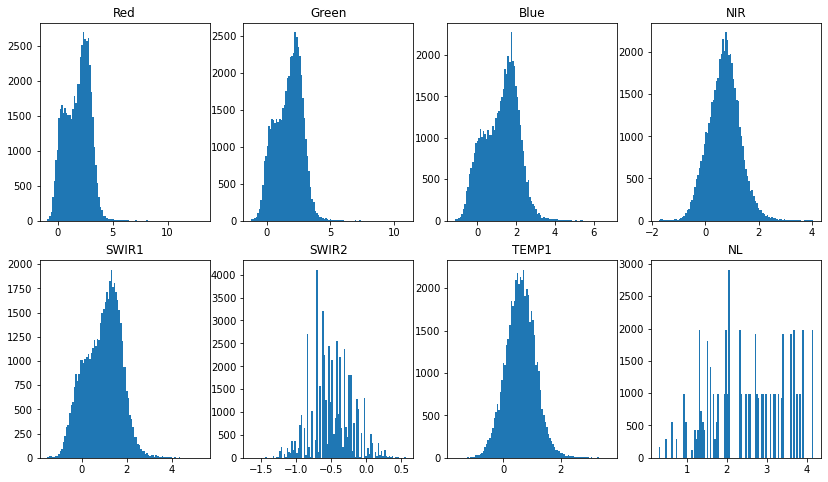

In [21]:
for i in range(3):
    filename=files[i]

    M=load(filename)

    Image=M['x']
    # generate RGB image (scaled)
    S=Image[:3,:,:].flatten()
    _min=percentile(S,0.1)
    _max=percentile(S,99.9)
    #print('Image',_min,_max)

    R=zeros([224,224,3])
    for i in range(3):
        R[:,:,i]=(Image[i,:,:]-_min)/(_max-_min)
    #print('R',min(R.flatten()),max(R.flatten()))
    R[R>1]=1
    R[R<0]=0

    figure(figsize=[5,5])
    imshow(R)
    title(filename)
    figure(figsize=[14,8])
    i=1
    for j in range(8):
        subplot(2,4,i)
        i+=1
        imshow(Image[j,:,:])
        title(band_names[j])

    figure(figsize=[14,8])
    i=1
    for j in range(8):
        subplot(2,4,i)
        i+=1
        hist(Image[j,:,:].flatten(),bins=100)
        title(band_names[j])